In [5]:
#https://github.com/hugom1997/Malware_Classification/blob/master/Malware_Classification.ipynb
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.utils import class_weight
import numpy as np
import pathlib
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

img_height = 32
img_width = 32
batch_size = 11000
path_root = "/Users/admin/Documents/cdu/Thesis/code/malware-classification/imageSec"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(img_height,img_width), batch_size=batch_size)
imgs, labels = next(batches)

Found 10732 images belonging to 9 classes.


In [6]:
batches.class_indices

{'Gatak': 0,
 'Kelihos_ver1': 1,
 'Kelihos_ver3': 2,
 'Lollipop': 3,
 'Obfuscator.ACY': 4,
 'Ramnit': 5,
 'Simda': 6,
 'Tracur': 7,
 'Vundo': 8}

In [8]:
imgs.shape

(10732, 32, 32, 3)

In [9]:

labels.shape[1]


9

In [10]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Plot random images from 9 malware families

In [11]:
plots(imgs, titles = labels)

<BarContainer object of 9 artists>

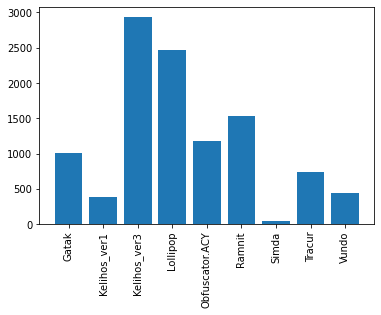

In [12]:
classes = batches.class_indices.keys()
counts = (sum(labels))
plt.xticks(rotation='vertical')
plt.bar(classes,counts)

Sequential Model


In [6]:
img_height = 32
img_width = 32
batch_size = 11000
path_root = "/Users/admin/Documents/cdu/Thesis/code/malware-classification/imageF"
#splite 80% for training and 20% for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_root,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(15000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(labels.shape[1])
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()



Found 10868 files belonging to 9 classes.
Using 8695 files for training.
Found 10868 files belonging to 9 classes.
Using 2173 files for validation.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8

In [14]:
#training mode
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/100


2021-08-20 20:51:41.022417: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-20 20:51:51.179298: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 3563 of 88000
2021-08-20 20:52:01.182047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 6888 of 88000
2021-08-20 20:52:06.225455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2021-08-20 20:52:06.318995: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 1 of 15000
2021-08-20 20:52:06.319047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


1/1 [==============================] - 37s 37s/step - loss: 2.2363 - accuracy: 0.1029 - val_loss: 2.1041 - val_accuracy: 0.1468
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 2.1046 - accuracy: 0.1548 - val_loss: 2.0035 - val_accuracy: 0.4156
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 2.0052 - accuracy: 0.4085 - val_loss: 1.9094 - val_accuracy: 0.4151
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 1.9134 - accuracy: 0.4075 - val_loss: 1.8232 - val_accuracy: 0.4137
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.8305 - accuracy: 0.4077 - val_loss: 1.7483 - val_accuracy: 0.4137
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.7605 - accuracy: 0.4075 - val_loss: 1.6753 - val_accuracy: 0.4169
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.6933 - accuracy: 0.4099 - val_loss: 1.6138 - val_accuracy: 0.4487
Epoch 8/100
1/1 [===========================

In [16]:
#training mode
epochs=200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/200


2021-08-20 20:59:20.648046: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 6290 of 88000
2021-08-20 20:59:24.329143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2021-08-20 20:59:24.437319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 1 of 15000
2021-08-20 20:59:24.437370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


1/1 [==============================] - 22s 22s/step - loss: 2.2375 - accuracy: 0.1082 - val_loss: 2.0062 - val_accuracy: 0.3234
Epoch 2/200
1/1 [==============================] - 4s 4s/step - loss: 2.0117 - accuracy: 0.3157 - val_loss: 1.9145 - val_accuracy: 0.2922
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 1.9268 - accuracy: 0.2791 - val_loss: 1.8969 - val_accuracy: 0.2842
Epoch 4/200
1/1 [==============================] - 4s 4s/step - loss: 1.9138 - accuracy: 0.2711 - val_loss: 1.8859 - val_accuracy: 0.2973
Epoch 5/200
1/1 [==============================] - 4s 4s/step - loss: 1.9028 - accuracy: 0.2836 - val_loss: 1.8673 - val_accuracy: 0.3187
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 1.8823 - accuracy: 0.3074 - val_loss: 1.8605 - val_accuracy: 0.3285
Epoch 7/200
1/1 [==============================] - 4s 4s/step - loss: 1.8736 - accuracy: 0.3180 - val_loss: 1.8606 - val_accuracy: 0.3253
Epoch 8/200
1/1 [===========================

In [10]:
#training mode
epochs=350
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/350


ValueError: in user code:

    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 299, 299, 3), found shape=(None, 32, 32, 3)


In [8]:
#training mode
epochs=600
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# scores = model.evaluate(X_test, y_test)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/600
1/1 [==============================] - 6s 6s/step - loss: 0.2493 - accuracy: 0.9246 - val_loss: 0.4009 - val_accuracy: 0.9038
Epoch 2/600
1/1 [==============================] - 3s 3s/step - loss: 0.2344 - accuracy: 0.9255 - val_loss: 0.4040 - val_accuracy: 0.9075
Epoch 3/600
1/1 [==============================] - 4s 4s/step - loss: 0.2346 - accuracy: 0.9257 - val_loss: 0.3870 - val_accuracy: 0.9139
Epoch 4/600
1/1 [==============================] - 4s 4s/step - loss: 0.2124 - accuracy: 0.9341 - val_loss: 0.3867 - val_accuracy: 0.9139
Epoch 5/600
1/1 [==============================] - 4s 4s/step - loss: 0.2167 - accuracy: 0.9310 - val_loss: 0.3738 - val_accuracy: 0.9172
Epoch 6/600
1/1 [==============================] - 5s 5s/step - loss: 0.2010 - accuracy: 0.9376 - val_loss: 0.3676 - val_accuracy: 0.9116
Epoch 7/600
1/1 [==============================] - 5s 5s/step - loss: 0.1979 - accuracy: 0.9389 - val_loss: 0.3418 - val_accuracy: 0.9195
Epoch 8/600
1/1 [=================

In [9]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.utils import class_weight
import numpy as np
import pathlib
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

#dataset
imgh = 299
imgw = 299
batchs = 11000
ImageFile.LOAD_TRUNCATED_IMAGES = True
#Generating DataSet
path_root = "/Users/admin/Documents/cdu/Thesis/code/malware-classification/imageSec"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(imgh,imgw), batch_size=batchs)
imgs, labels = next(batches)

print("Number of labels : " , len(batches.class_indices))
num_classes = len(batches.class_indices)
# print(imgs/255.)
X_train, X_test, y_train, y_test = train_test_split(imgs,labels, test_size=0.3)
print("X_train : " , X_train)

# Gives pretrained model on "imagenet" with 1000 classes
pre_trained_model = InceptionV3()

for layer in pre_trained_model.layers:
  layer.trainable = False
  
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

#(None, 1000)	  
print("pre_trained_model.output_shape : " , pre_trained_model.output_shape)

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.layers[-1].output)
#x = tf.reshape( pre_trained_model.output, [-1,10])

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (num_classes, activation='softmax')(x)   
 
model = Model( pre_trained_model.inputs, x) 

#(None, 9)
print("model.output_shape : ", model.output_shape)


model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
print("model.summary ")
model.summary()
print()
#reshape lable as 2D
# Our vectorized labels
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# X_test = np.asarray(X_test).astype('float32').reshape((-1,1))
callbacks = myCallback()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

#show diagram
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
model.summary()


Found 10732 images belonging to 9 classes.
Number of labels :  9
X_train :  [[[[ 86.  86.  86.]
   [ 51.  51.  51.]
   [191. 191. 191.]
   ...
   [  4.   4.   4.]
   [ 55.  55.  55.]
   [ 51.  51.  51.]]

  [[255. 255. 255.]
   [200. 200. 200.]
   [ 43.  43.  43.]
   ...
   [133. 133. 133.]
   [252. 252. 252.]
   [255. 255. 255.]]

  [[ 86.  86.  86.]
   [ 86.  86.  86.]
   [133. 133. 133.]
   ...
   [139. 139. 139.]
   [186. 186. 186.]
   [254. 254. 254.]]

  ...

  [[244. 244. 244.]
   [ 93.  93.  93.]
   [217. 217. 217.]
   ...
   [ 88.  88.  88.]
   [233. 233. 233.]
   [  5.   5.   5.]]

  [[  0.   0.   0.]
   [131. 131. 131.]
   [  2.   2.   2.]
   ...
   [ 32.  32.  32.]
   [ 96.  96.  96.]
   [251. 251. 251.]]

  [[133. 133. 133.]
   [116. 116. 116.]
   [217. 217. 217.]
   ...
   [ 89.  89.  89.]
   [219. 219. 219.]
   [217. 217. 217.]]]


 [[[144. 144. 144.]
   [144. 144. 144.]
   [144. 144. 144.]
   ...
   [211. 211. 211.]
   [232. 232. 232.]
   [232. 232. 232.]]

  [[144. 144

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


235/235 [==============================] - 957s 4s/step - loss: 1.9725 - acc: 0.4720 - val_loss: 1.7754 - val_acc: 0.4854
Epoch 2/1000
235/235 [==============================] - 991s 4s/step - loss: 1.6359 - acc: 0.4921 - val_loss: 1.5283 - val_acc: 0.5034
Epoch 3/1000
235/235 [==============================] - 994s 4s/step - loss: 1.4772 - acc: 0.5088 - val_loss: 1.4297 - val_acc: 0.5118
Epoch 4/1000
235/235 [==============================] - 1005s 4s/step - loss: 1.4094 - acc: 0.5274 - val_loss: 1.3849 - val_acc: 0.5211
Epoch 5/1000
235/235 [==============================] - 960s 4s/step - loss: 1.3757 - acc: 0.5321 - val_loss: 1.3626 - val_acc: 0.5264
Epoch 6/1000
235/235 [==============================] - 944s 4s/step - loss: 1.3584 - acc: 0.5359 - val_loss: 1.3498 - val_acc: 0.5295
Epoch 7/1000
235/235 [==============================] - 852s 4s/step - loss: 1.3459 - acc: 0.5393 - val_loss: 1.3411 - val_acc: 0.5429
Epoch 8/1000
235/235 [==============================] - 819s 3s/ste

KeyboardInterrupt: 